# Categorical scatterplots

* The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [21]:
tips = pd.DataFrame(data = sns.load_dataset("tips"))
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [23]:
tips.astype

<bound method NDFrame.astype of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

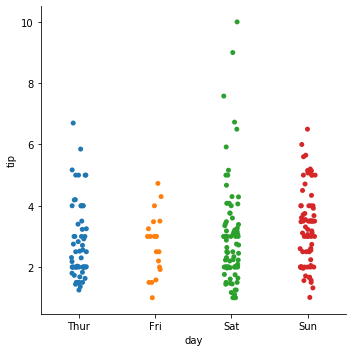

In [25]:
sns.catplot(x = "day", y = "tip", data = tips)
pass

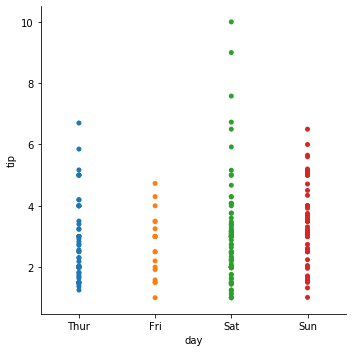

In [27]:
sns.catplot(x = "day", y = "tip", data = tips,
           jitter = False)
pass

* The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by `swarmplot()`, which is activated by setting `kind="swarm"` in `catplot()`:

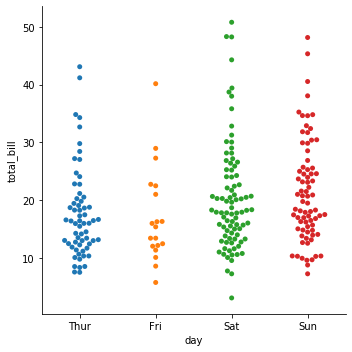

In [28]:
sns.catplot(x="day", y="total_bill", 
            kind="swarm", data=tips);

* Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

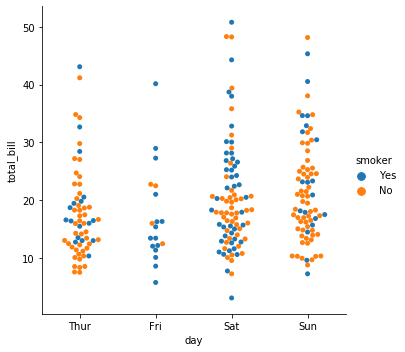

In [30]:
sns.catplot(x="day", y="total_bill", hue = 'smoker',
            kind="swarm", data=tips);
pass

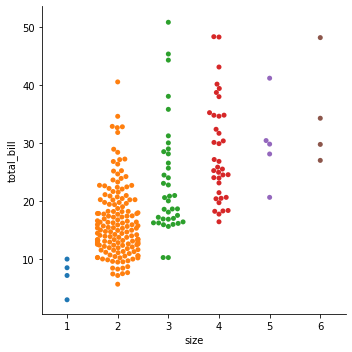

In [31]:
sns.catplot(x = 'size', y = 'total_bill', kind = 'swarm',
           data = tips)
pass

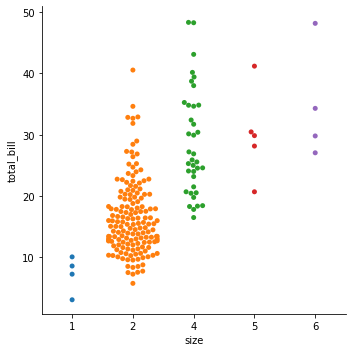

In [32]:
### Remove one categorical value
sns.catplot(x = 'size', y = 'total_bill', kind = 'swarm',
           data = tips.query("size != 3"))
pass

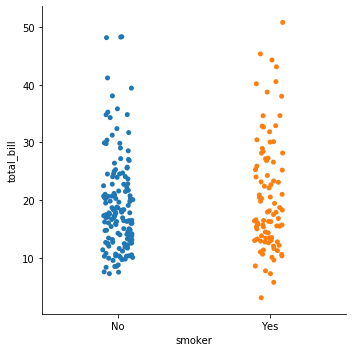

In [34]:
## Put in the order we want: 
order_smoker = ['No', 'Yes']; 
sns.catplot(x = 'smoker', y = 'total_bill', 
            order = order_smoker, 
            data = tips);
pass

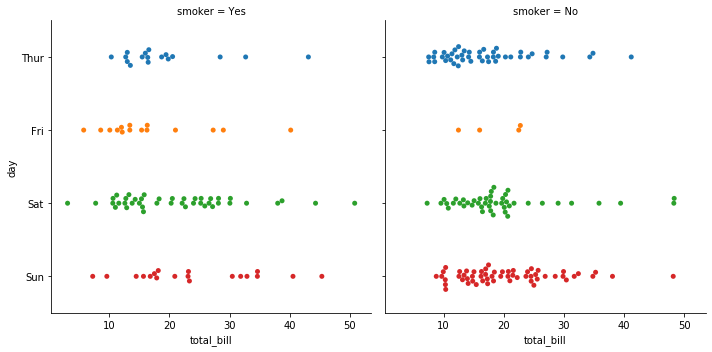

In [36]:
## Swap the assingment of variables to axes: 
sns.catplot(x = 'total_bill',
           y = 'day', col = 'smoker',
           data = tips, kind = 'swarm');
pass

# Distributions of observations within categories: 

* As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.


## Boxplot
* The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

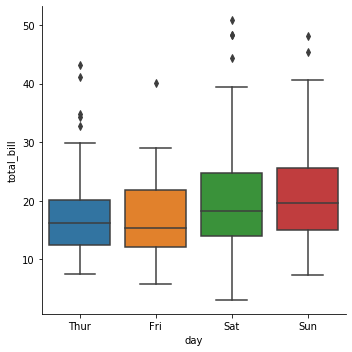

In [37]:
sns.catplot(x = 'day', y = 'total_bill', 
           data = tips, 
           kind = 'box');
pass

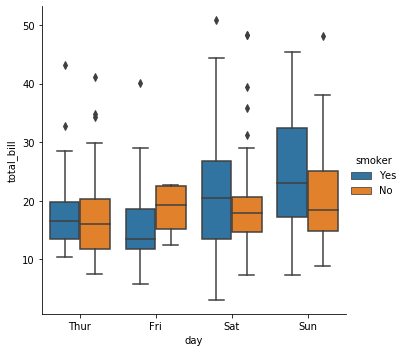

In [38]:
sns.catplot(x = 'day', y = 'total_bill', 
           data = tips, 
           kind = 'box', 
           hue = 'smoker');
pass

* A related function, `boxenplot()`, draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

In [40]:
diamonds = pd.DataFrame(data = sns.load_dataset('diamonds'));
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

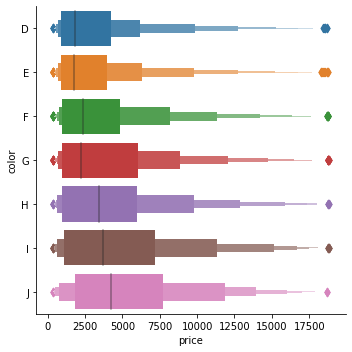

In [43]:
sns.catplot(x = 'price', y = 'color',
           kind = 'boxen',
           data=diamonds.sort_values("color"));

## Violinplots
* Violinplots combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

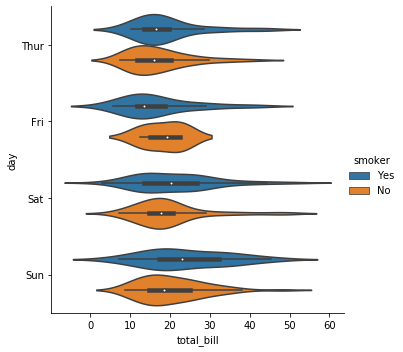

In [46]:
sns.catplot(x = 'total_bill', y = 'day', 
           data = tips, 
           kind = 'violin', hue = 'smoker');
pass

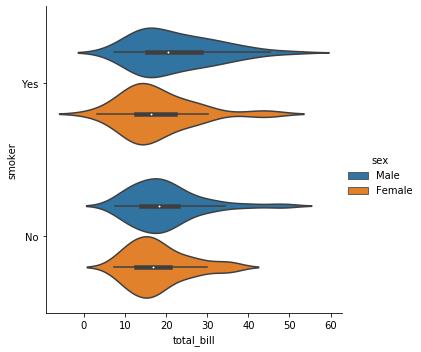

In [47]:
sns.catplot(x = 'total_bill', y = 'smoker', 
           data = tips, 
           kind = 'violin', hue = 'sex');
pass

* It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

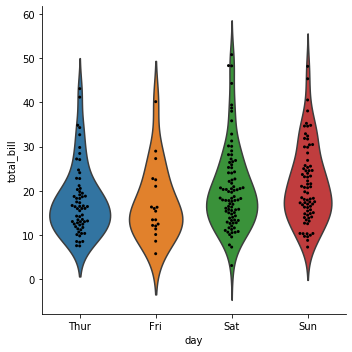

In [49]:
gplot = sns.catplot(x = 'day', y='total_bill', kind = 'violin',
                   inner = None, data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', color = 'k',
             size = 3, data = tips, ax = gplot.ax);
pass

# Histogram (Barplots)

* A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

In [50]:
titanic = sns.load_dataset('titanic');
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

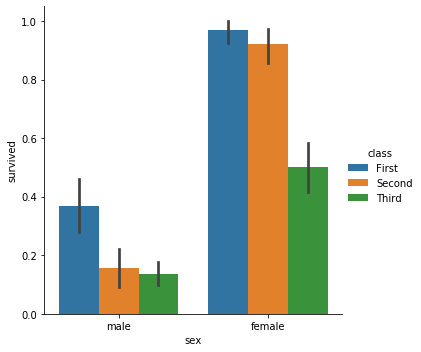

In [52]:
sns.catplot(x = 'sex', y = 'survived',
           hue = 'class', 
           kind = 'bar',
           data = titanic);
pass

* A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

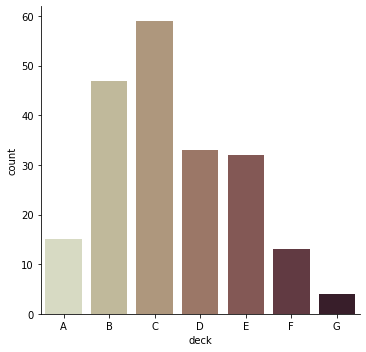

In [53]:
sns.catplot(x = 'deck', data = titanic,
           kind = 'count',
           palette = "ch:.5");
pass

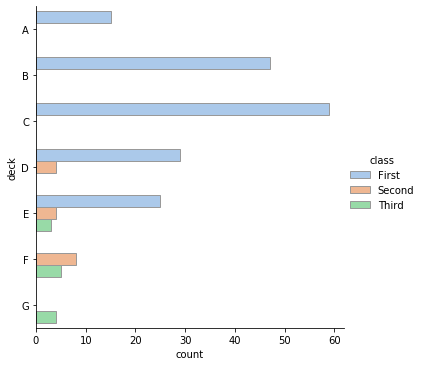

In [54]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

# Pointplots

* An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes:

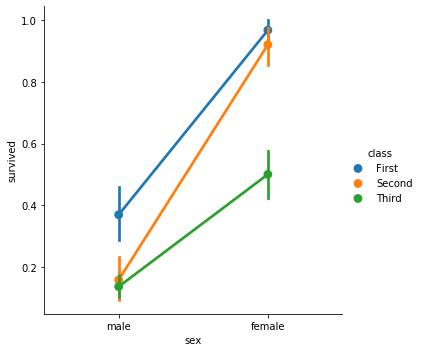

In [55]:
sns.catplot(x = 'sex', y  = 'survived',
           hue = 'class', kind = 'point',
           data = titanic);
pass

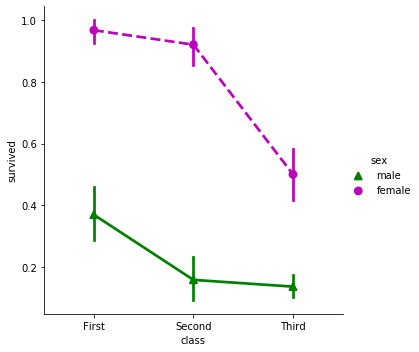

In [56]:
### linestyle along with the hue to make figures are maximally
### accessible and reproduce well in black and white.
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);
pass

# Showing multiple relationships with facets

In [58]:
tips = sns.load_dataset('tips');
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

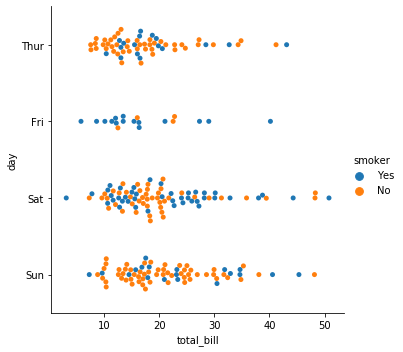

In [60]:
sns.catplot(x = 'total_bill', y = 'day', data = tips,
           hue = 'smoker', kind = 'swarm');
pass

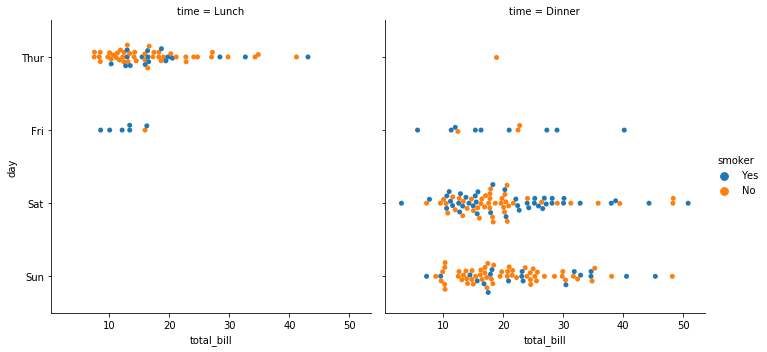

In [61]:
sns.catplot(x = 'total_bill', y = 'day', data = tips,
           hue = 'smoker', kind = 'swarm', col = 'time');
pass

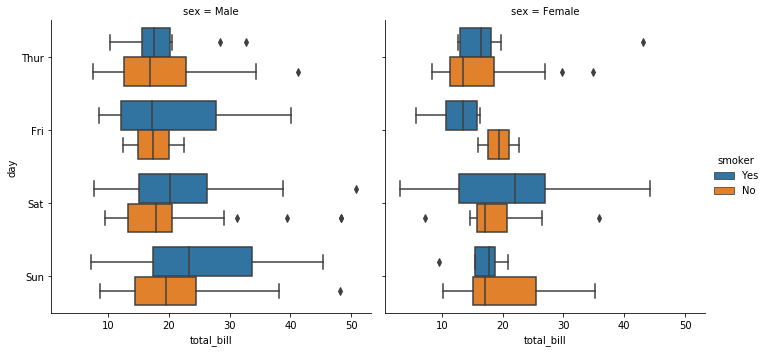

In [63]:
sns.catplot(x = 'total_bill', y = 'day', data = tips,
           hue = 'smoker', kind = 'box', col = 'sex');
pass

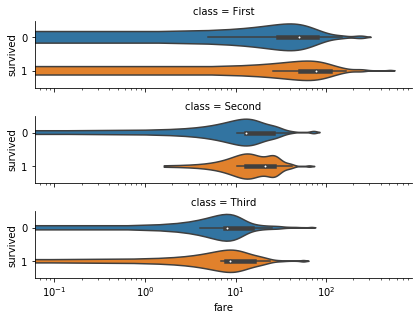

In [69]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="violin", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");